# Exercício

Enviar para o email filipe.furlan@letscode.com.br até **2021/08/12** o notebook (`matematica_firtsname_lastname_aula09.ipynb`) com a resolução dos exercicios abaixo.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats

pio.templates.default = 'plotly_dark'

# Relembrando o Teorema Central do Limite (TCL ou CLT)

Seja uma amostra aleatória ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com qualquer distribuição, média $\mu$ e desvio padrão $\sigma$. A medida que $n$ cresce, a distribuição de probabilidade da média amostral, $\overline{X}$, se aproxima de uma Normal com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt{n}}$. Isto é $\overline{X} \sim N (\mu, \sigma^2/n)$. Se a transformação a baixo for realizada, então $Z \sim N (0,1)$.

$$Z = \frac{\overline{X} -\mu}{\sigma/\sqrt{n}} $$



O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

# Carregando os dados

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../datasets/pnad_2015.csv')

In [8]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Exercício 1

1. Calcule a média (mu) e o desvio padrão (sigma) da idade dos brasileiros.
1. Faça um histograma das idades.
1. Encontre o número de amostras $N$ e o tamanho amostral $n$ que comprovem a validade do TLC com um erro absoluto menor que 0.05.
    - calcule a média das médias $\bar{x}$;
    - erro = ($\bar{x}$ - mu) / mu.
1. Para os valores de $N$ e $n$ encontrados acima, qual o erro do desvio padrão do TLC ($\sigma_X$) comparado com o valor real?
1. Faça um histograma (barras) da média das médias.

In [9]:
# Questão 1
mu=np.mean(df['Idade'])
sigma=np.std(df['Idade'])


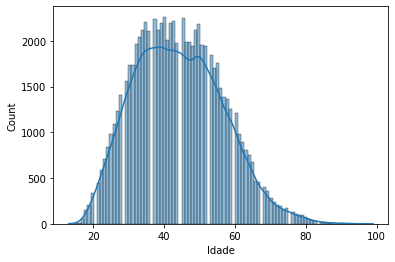

In [10]:
# Questão 2
sns.histplot(data=df,x= 'Idade',kde=True)

In [13]:
#Questão 3
N_list=[50,100,500,1000] # amostras
n_list=[100,500,1000] # tamanho amostral


for N in N_list:
    for n in n_list:
        means=[df['Idade'].sample(n=n,replace=True).mean() for i in range(N)]
        x_bar=np.mean(means) #media das medias
        sigma_bar=np.std(means)
        erro_abs=round(abs((x_bar-mu)/mu),4)
        if erro_abs<0.005:
            print(f'N={N:4}, n = {n:4}, {erro_abs:5.4f}')

N=  50, n =  100, 0.0030
N=  50, n =  500, 0.0012
N=  50, n = 1000, 0.0022
N= 100, n =  100, 0.0012
N= 100, n =  500, 0.0007
N= 100, n = 1000, 0.0012
N= 500, n =  100, 0.0006
N= 500, n =  500, 0.0008
N= 500, n = 1000, 0.0007
N=1000, n =  100, 0.0012
N=1000, n =  500, 0.0005
N=1000, n = 1000, 0.0002


In [21]:
#Questão 4
N=500
n=1000
sigma_x=sigma/np.sqrt(n)
erro=round(abs((sigma_x-sigma)/sigma),4)
erro

0.9684

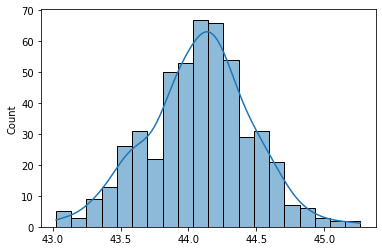

In [14]:
#Questão 5
means=[df['Idade'].sample(n=n,replace=True).mean() for i in range(N)]
sns.histplot(means,kde=True)

# Exercício 2

Considerando a renda dos brasileiros que ganham até R$ 25.000,00.

1. Faça um histograma dos valores de renda.
1. Usando os valores de $N$ e $n$ encontrados acima, calcule a média ($\bar{x}$) e o desvio padrão ($\sigma_X$) das médias.
1. Qual o erro dos resultados acima comparados com o valor da população?

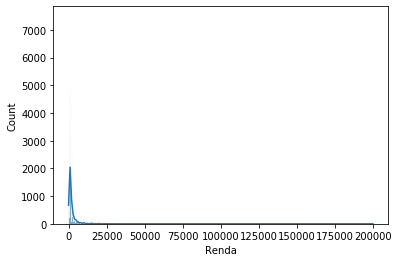

In [22]:
#Questão 1
sns.histplot(df['Renda'],kde=True)

2001.97 103.78


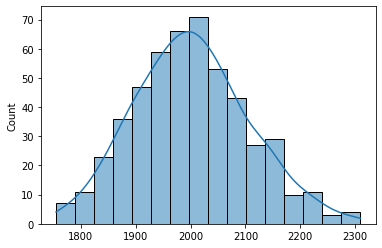

In [26]:
#Questão 2
n=1000
N=500
sigma=df['Renda'].std()
mu=df['Renda'].mean()
means=[df['Renda'].sample(n=n,replace=True).mean() for i in range(N)]
x_bar=np.mean(means) #media das medias
sigma_bar=np.std(means)
print(round(x_bar,2),round(sigma_bar,2))
sns.histplot(means,kde=True)

In [28]:
erro_medias=round(abs(mu-x_bar),4)
erro_sigma=round(abs(sigma-sigma_bar),4)/np.sqrt(n)
print(round(erro_medias,2),round(erro_sigma,2))

1.58 101.81


# Exercício 3

Até aqui, usamos os valores reais da população para mostrar a validade do TLC. Explique brevemente como você usaria as técnicas de amostragem e o TLC para estimar o valor de um parâmetro desconhecido, por exemplo, o tempo médio de espera na fila para atendimento nos caixas do banco.